In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(10):
    if i==0:
        train = pd.read_pickle('salida/final/SNLI/DEV/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/final//SNLI/DEV/DEV_'+str(i+1)+'.csv_.pickle')
        train=pd.concat([train,temp])

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,1.729302,623.341675,2.625,2.535,3.987484,0.003045,0.413057,0.593170,0,0,...,"the{the,DET} sisters...","sisters{sister,NOUN} ...",0.307692,0.25,0.181818,0.555556,[],"[hugging goodbye, eating lunch, sisters are hu...",0.000000,neutral
1,0.000000,0.000000,2.596,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"two{two,NUM} woman{w...","Empty DataFrame Columns: [] Index: [two{two,NU...",0.000000,0.00,0.000000,0.000000,[],"[holding packages, woman are holding packages ]",0.000000,entailment
2,1.602948,251.219803,2.678,2.439,3.921521,0.003236,0.386005,0.456248,0,1,...,"the{the,DET} men{man...","fighting{fight,VERB} ...",0.000000,0.00,0.000000,0.222222,[],[],0.000000,contradiction
3,0.000000,0.000000,2.899,0.000,0.000000,0.000000,0.000000,1.000000,2,0,...,"two{two,NUM} kids{ki...","Empty DataFrame Columns: [] Index: [two{two,NU...",0.142857,0.00,0.000000,0.000000,"[young children, blue jerseys, wooden steps, c...","[numbered jerseys, jerseys wash, kids wash han...",0.000000,entailment
4,4.579613,132.263779,2.773,1.638,4.019877,0.003092,0.383457,0.266037,1,0,...,"two{two,NUM} kids{ki...","ballgame{ballgame,NOU...",0.142857,0.00,0.000000,0.031250,"[young children, blue jerseys, wooden steps, c...","[ballgame wash, kids wash hands ]",0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,0.000000,0.000000,2.782,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"the{the,DET} carouse...","Empty DataFrame Columns: [] Index: [a{a,DET}, ...",0.000000,0.00,0.000000,0.000000,"[small girl, girl wearing, pink jacket]",[],0.000000,entailment
9838,2.540222,244.432373,2.827,2.135,3.957334,0.003194,0.383037,0.433939,0,0,...,"the{the,DET} girl{gi...","speed{speed,NOUN} li...",0.000000,0.00,0.000000,0.166667,"[small girl, girl wearing, pink jacket]",[],0.000000,contradiction
9839,5.768492,134.942886,2.563,2.347,4.001124,0.002731,0.431131,0.339118,0,0,...,"people{people,NOUN} ...","people{people,NOUN} a...",0.500000,0.00,0.000000,0.031250,"[young girl, pink ribbons, zebra skirt, skirt ...",[water fountain],1.000000,entailment
9840,5.365660,262.998779,2.772,2.629,4.028790,0.002840,0.647039,0.277380,0,0,...,"a{a,DET} young{young...","knits{knit,VERB} swe...",0.400000,0.25,0.000000,0.062500,"[young girl, pink ribbons, zebra skirt, skirt ...","[young girl, girl knits, girl knits sweater ]",0.333333,contradiction


In [4]:
train["clases"].unique()

array(['neutral', 'entailment', 'contradiction'], dtype=object)

In [5]:
train["clases"].describe()

count           9842
unique             3
top       entailment
freq            3329
Name: clases, dtype: object

In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'similitud_faltantes', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_relaciones',
       'listas_malign', 'listas_malignf', 'list_bigram', 'list_trigram',
       'list_cuatrigram', 'diferencias', 'bi_ent_trip_t', 'bi_ent_trip_h',
       'bi_ent_trip_rel', 'clases'],
      dtype='object')

In [13]:
train["ent_rel2"]=train["entropia_total"]-train["entropias"]

array([[<Axes: title={'center': 'ent_rel'}, xlabel='clases'>,
        <Axes: title={'center': 'ent_rel2'}, xlabel='clases'>],
       [<Axes: title={'center': 'entropias'}, xlabel='clases'>,
        <Axes: title={'center': 'entropia_total'}, xlabel='clases'>]],
      dtype=object)

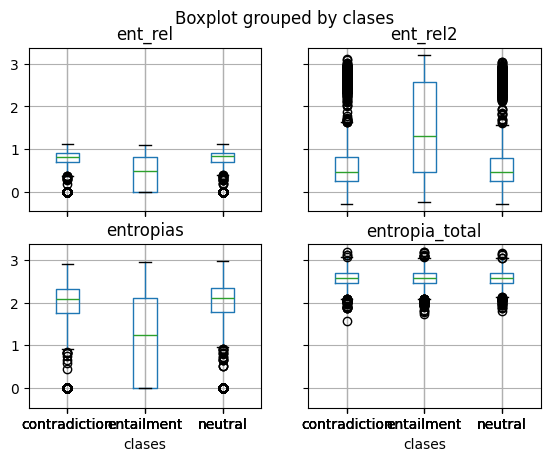

In [16]:
train.boxplot(by="clases",column=["ent_rel","ent_rel2","entropias","entropia_total"])

## Eliminar características

In [17]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,1.729302,623.341675,2.625,2.535,3.987484,0.003045,0.413057,0.593170,0,0,...,5,9,0.307692,0.25,0.181818,0.555556,0.000000,neutral,0.965714,0.090
1,0.000000,0.000000,2.596,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,9,0.000000,0.00,0.000000,0.000000,0.000000,entailment,0.000000,2.596
2,1.602948,251.219803,2.678,2.439,3.921521,0.003236,0.386005,0.456248,0,1,...,2,9,0.000000,0.00,0.000000,0.222222,0.000000,contradiction,0.910754,0.239
3,0.000000,0.000000,2.899,0.000,0.000000,0.000000,0.000000,1.000000,2,0,...,0,32,0.142857,0.00,0.000000,0.000000,0.000000,entailment,0.000000,2.899
4,4.579613,132.263779,2.773,1.638,4.019877,0.003092,0.383457,0.266037,1,0,...,1,32,0.142857,0.00,0.000000,0.031250,0.000000,neutral,0.590696,1.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,0.000000,0.000000,2.782,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,12,0.000000,0.00,0.000000,0.000000,0.000000,entailment,0.000000,2.782
9838,2.540222,244.432373,2.827,2.135,3.957334,0.003194,0.383037,0.433939,0,0,...,2,12,0.000000,0.00,0.000000,0.166667,0.000000,contradiction,0.755218,0.692
9839,5.768492,134.942886,2.563,2.347,4.001124,0.002731,0.431131,0.339118,0,0,...,1,32,0.500000,0.00,0.000000,0.031250,1.000000,entailment,0.915724,0.216
9840,5.365660,262.998779,2.772,2.629,4.028790,0.002840,0.647039,0.277380,0,0,...,2,32,0.400000,0.25,0.000000,0.062500,0.333333,contradiction,0.948413,0.143


In [18]:
train=train.drop(["entropias","max_info","similitud_faltantes","distancias","list_trigram","list_cuatrigram","sumas","diferencias"],axis=1)

In [46]:
#train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
#train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [47]:
#train=train.drop(["Total T"],axis=1)

In [19]:
train

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,2.625,3.987484,0.003045,0,0,1,14,5,9,0.307692,0.000000,neutral,0.965714,0.090
1,2.596,0.000000,0.000000,0,0,0,5,0,9,0.000000,0.000000,entailment,0.000000,2.596
2,2.678,3.921521,0.003236,0,1,0,7,2,9,0.000000,0.000000,contradiction,0.910754,0.239
3,2.899,0.000000,0.000000,2,0,0,8,0,32,0.142857,0.000000,entailment,0.000000,2.899
4,2.773,4.019877,0.003092,1,0,0,8,1,32,0.142857,0.000000,neutral,0.590696,1.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,2.782,0.000000,0.000000,0,0,1,4,0,12,0.000000,0.000000,entailment,0.000000,2.782
9838,2.827,3.957334,0.003194,0,0,1,9,2,12,0.000000,0.000000,contradiction,0.755218,0.692
9839,2.563,4.001124,0.002731,0,0,0,5,1,32,0.500000,1.000000,entailment,0.915724,0.216
9840,2.772,4.028790,0.002840,0,0,0,6,2,32,0.400000,0.333333,contradiction,0.948413,0.143


In [20]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [21]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [22]:
train_m

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,ent_rel,ent_rel2
entropia_total,1.000000,-0.017846,-0.035678,0.051996,0.089594,0.028606,0.191957,-0.029252,0.172993,-0.032218,0.018800,-0.027192,0.105649
mutinf,-0.017846,1.000000,0.365769,-0.028834,-0.028889,-0.021853,0.152732,0.616347,-0.008405,-0.344240,-0.165965,0.946348,-0.941727
mearts,-0.035678,0.365769,1.000000,-0.021047,-0.008488,-0.014181,0.068969,0.293864,-0.055038,-0.157042,-0.066309,0.375446,-0.376166
list_comp,0.051996,-0.028834,-0.021047,1.000000,-0.038726,0.004479,0.095975,-0.034520,0.014370,-0.140698,-0.092516,-0.039550,0.042373
list_incomp,0.089594,-0.028889,-0.008488,-0.038726,1.000000,-0.019117,0.105963,-0.007268,0.034182,-0.120244,-0.072575,-0.026794,0.034671
list_rel_con,0.028606,-0.021853,-0.014181,0.004479,-0.019117,1.000000,0.188694,0.019890,0.034079,-0.136984,-0.068026,-0.016302,0.018262
list_M,0.191957,0.152732,0.068969,0.095975,0.105963,0.188694,1.000000,0.431377,0.174316,0.189772,0.228046,0.189588,-0.175235
list_m,-0.029252,0.616347,0.293864,-0.034520,-0.007268,0.019890,0.431377,1.000000,0.038325,-0.350482,-0.168767,0.705358,-0.702121
list_T,0.172993,-0.008405,-0.055038,0.014370,0.034182,0.034079,0.174316,0.038325,1.000000,0.025580,0.033832,0.044846,-0.030161
list_bigram,-0.032218,-0.344240,-0.157042,-0.140698,-0.120244,-0.136984,0.189772,-0.350482,0.025580,1.000000,0.527795,-0.356118,0.347016


<Axes: >

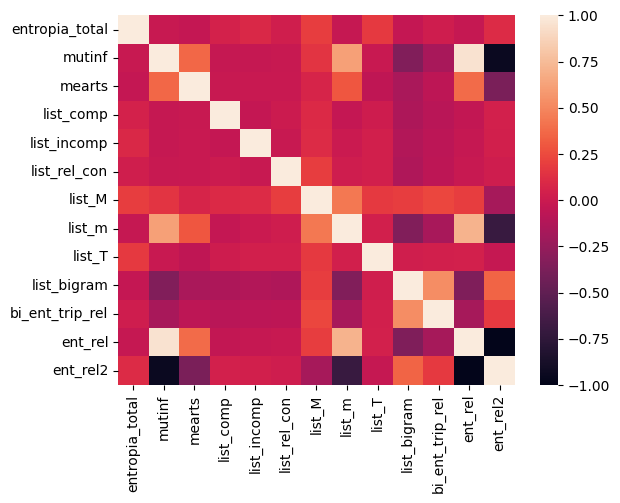

In [23]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [24]:
train_m

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,ent_rel,ent_rel2
entropia_total,1.000000,-0.017846,-0.035678,0.051996,0.089594,0.028606,0.191957,-0.029252,0.172993,-0.032218,0.018800,-0.027192,0.105649
mutinf,-0.017846,1.000000,0.365769,-0.028834,-0.028889,-0.021853,0.152732,0.616347,-0.008405,-0.344240,-0.165965,0.946348,-0.941727
mearts,-0.035678,0.365769,1.000000,-0.021047,-0.008488,-0.014181,0.068969,0.293864,-0.055038,-0.157042,-0.066309,0.375446,-0.376166
list_comp,0.051996,-0.028834,-0.021047,1.000000,-0.038726,0.004479,0.095975,-0.034520,0.014370,-0.140698,-0.092516,-0.039550,0.042373
list_incomp,0.089594,-0.028889,-0.008488,-0.038726,1.000000,-0.019117,0.105963,-0.007268,0.034182,-0.120244,-0.072575,-0.026794,0.034671
list_rel_con,0.028606,-0.021853,-0.014181,0.004479,-0.019117,1.000000,0.188694,0.019890,0.034079,-0.136984,-0.068026,-0.016302,0.018262
list_M,0.191957,0.152732,0.068969,0.095975,0.105963,0.188694,1.000000,0.431377,0.174316,0.189772,0.228046,0.189588,-0.175235
list_m,-0.029252,0.616347,0.293864,-0.034520,-0.007268,0.019890,0.431377,1.000000,0.038325,-0.350482,-0.168767,0.705358,-0.702121
list_T,0.172993,-0.008405,-0.055038,0.014370,0.034182,0.034079,0.174316,0.038325,1.000000,0.025580,0.033832,0.044846,-0.030161
list_bigram,-0.032218,-0.344240,-0.157042,-0.140698,-0.120244,-0.136984,0.189772,-0.350482,0.025580,1.000000,0.527795,-0.356118,0.347016


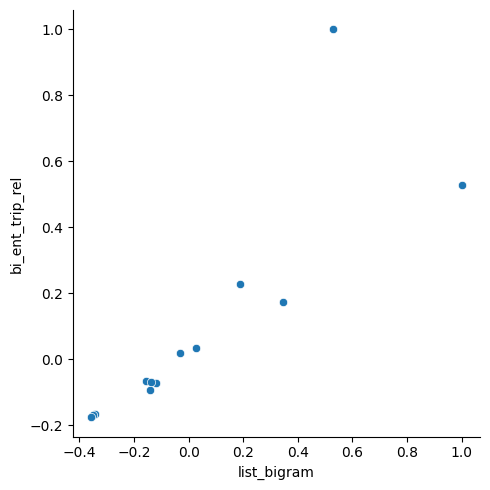

In [25]:
# Checar variables colineales
sns.relplot(data=train_m, x="list_bigram", y="bi_ent_trip_rel")

In [26]:
# RTE3
y_train=[]
c_y=0
c_u=0
c_n=0
for i in y_:
    if i == "entailment":
        y_train.append(1)
        c_y+=1
    elif i=="neutral":
        y_train.append(1)
        c_u+=1
    elif i=="contradiction":
        y_train.append(0)
        c_n+=1
    else:
        print("ora",i)

In [27]:
print(c_y,c_u,c_n)

3329 3235 3278


In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

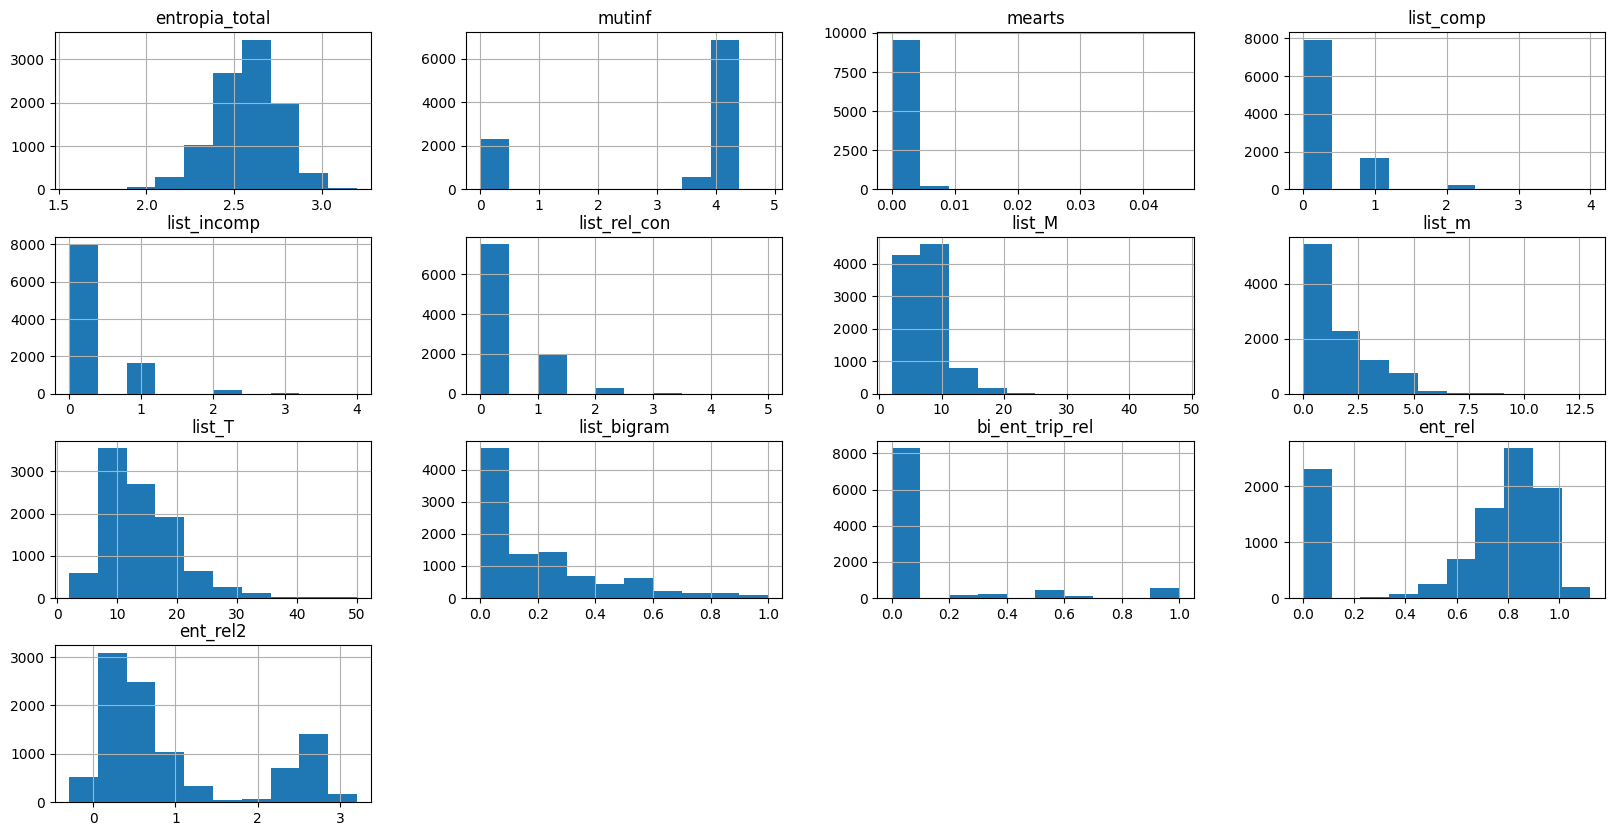

In [29]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [30]:
for i in range(10):
    if i==0:
        test = pd.read_pickle('salida/final/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/final/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
        test=pd.concat([test,temp])

In [31]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,2.975561,409.989990,2.553,2.119,4.050864,0.002734,0.327449,0.428960,0,0,...,"the{the,DET} church{chur...","has{have,VERB} cracks{cr...",0.000000,0.000000,0.0,0.166667,"[church choir, choir sings, sing joyous, joyou...",[church has cracks ],0.0,neutral
1,3.076283,132.461014,2.783,1.864,4.029514,0.002743,0.361612,0.310491,0,0,...,"the{the,DET} church{chur...","filled{fill,VERB} this{th...",0.000000,0.000000,0.0,0.055556,"[church choir, choir sings, sing joyous, joyou...",[],0.0,entailment
2,2.063605,271.342590,2.481,1.510,3.952607,0.003112,0.238246,0.276181,0,0,...,"a{a,DET} choir{choir,NOU...","baseball{baseball,NOUN} ...",0.166667,0.000000,0.0,0.111111,"[church choir, choir sings, sing joyous, joyou...","[choir singing, baseball game]",0.0,contradiction
3,2.938195,112.245842,2.674,1.988,4.029111,0.002930,0.515233,0.400364,0,0,...,"the{the,DET} woma...","young{young,ADJ} a...",0.000000,0.000000,0.0,0.076923,"[blue shirt, big grin]",[],0.0,neutral
4,2.278650,118.761765,2.694,1.881,3.967757,0.003058,0.469705,0.264149,0,0,...,"the{the,DET} woma...","happy{happy,ADJ} a...",0.000000,0.000000,0.0,0.076923,"[blue shirt, big grin]",[],0.0,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.780411,375.203339,2.513,2.459,3.916517,0.003865,0.467442,0.631407,0,0,...,"two{two,NUM} women...","standing{stand,VERB...",0.285714,0.166667,0.0,0.666667,[women are observing something ],[eyes closed],0.0,contradiction
9814,2.282163,88.999184,2.720,1.918,3.900133,0.002878,0.547499,0.518552,0,1,...,"two{two,NUM} girls...","looking{look,VERB} ...",0.000000,0.000000,0.0,0.166667,[women are observing something ],[],0.0,entailment
9815,2.506649,113.424171,2.185,1.993,3.890102,0.003470,0.363617,0.246159,0,0,...,"a{a,DET} man{man,N...","kite{kite,NOUN} a{a...",0.200000,0.000000,0.0,0.058824,"[black leather, leather jacket, hand speaks]",[man is flying kite ],0.0,contradiction
9816,0.000000,0.000000,2.322,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"a{a,DET} man{man,N...","Empty DataFrame Columns: [] Index: [a{a,DET}, ...",0.500000,0.200000,0.0,0.000000,"[black leather, leather jacket, hand speaks]",[],0.0,entailment


In [32]:
test["ent_rel"]=test["entropias"]/test["entropia_total"]
test["ent_rel2"]=test["entropia_total"]-test["entropias"]

In [33]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,2.975561,409.989990,2.553,2.119,4.050864,0.002734,0.327449,0.428960,0,0,...,3,18,0.000000,0.000000,0.0,0.166667,0.0,neutral,0.830004,0.434
1,3.076283,132.461014,2.783,1.864,4.029514,0.002743,0.361612,0.310491,0,0,...,1,18,0.000000,0.000000,0.0,0.055556,0.0,entailment,0.669781,0.919
2,2.063605,271.342590,2.481,1.510,3.952607,0.003112,0.238246,0.276181,0,0,...,2,18,0.166667,0.000000,0.0,0.111111,0.0,contradiction,0.608626,0.971
3,2.938195,112.245842,2.674,1.988,4.029111,0.002930,0.515233,0.400364,0,0,...,1,13,0.000000,0.000000,0.0,0.076923,0.0,neutral,0.743455,0.686
4,2.278650,118.761765,2.694,1.881,3.967757,0.003058,0.469705,0.264149,0,0,...,1,13,0.000000,0.000000,0.0,0.076923,0.0,entailment,0.698218,0.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.780411,375.203339,2.513,2.459,3.916517,0.003865,0.467442,0.631407,0,0,...,4,6,0.285714,0.166667,0.0,0.666667,0.0,contradiction,0.978512,0.054
9814,2.282163,88.999184,2.720,1.918,3.900133,0.002878,0.547499,0.518552,0,1,...,1,6,0.000000,0.000000,0.0,0.166667,0.0,entailment,0.705147,0.802
9815,2.506649,113.424171,2.185,1.993,3.890102,0.003470,0.363617,0.246159,0,0,...,1,17,0.200000,0.000000,0.0,0.058824,0.0,contradiction,0.912128,0.192
9816,0.000000,0.000000,2.322,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,17,0.500000,0.200000,0.0,0.000000,0.0,entailment,0.000000,2.322


In [34]:
test=test.drop(["entropias","max_info","similitud_faltantes","distancias","list_trigram","list_cuatrigram","sumas","diferencias"],axis=1)
test

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,2.553,4.050864,0.002734,0,0,0,7,3,18,0.000000,0.0,neutral,0.830004,0.434
1,2.783,4.029514,0.002743,0,0,0,6,1,18,0.000000,0.0,entailment,0.669781,0.919
2,2.481,3.952607,0.003112,0,0,1,7,2,18,0.166667,0.0,contradiction,0.608626,0.971
3,2.674,4.029111,0.002930,0,0,0,4,1,13,0.000000,0.0,neutral,0.743455,0.686
4,2.694,3.967757,0.003058,0,0,0,5,1,13,0.000000,0.0,entailment,0.698218,0.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,2.513,3.916517,0.003865,0,0,0,8,4,6,0.285714,0.0,contradiction,0.978512,0.054
9814,2.720,3.900133,0.002878,0,1,0,6,1,6,0.000000,0.0,entailment,0.705147,0.802
9815,2.185,3.890102,0.003470,0,0,1,6,1,17,0.200000,0.0,contradiction,0.912128,0.192
9816,2.322,0.000000,0.000000,0,0,0,7,0,17,0.500000,0.0,entailment,0.000000,2.322


In [35]:
#test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
#test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [36]:
test

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,2.553,4.050864,0.002734,0,0,0,7,3,18,0.000000,0.0,neutral,0.830004,0.434
1,2.783,4.029514,0.002743,0,0,0,6,1,18,0.000000,0.0,entailment,0.669781,0.919
2,2.481,3.952607,0.003112,0,0,1,7,2,18,0.166667,0.0,contradiction,0.608626,0.971
3,2.674,4.029111,0.002930,0,0,0,4,1,13,0.000000,0.0,neutral,0.743455,0.686
4,2.694,3.967757,0.003058,0,0,0,5,1,13,0.000000,0.0,entailment,0.698218,0.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,2.513,3.916517,0.003865,0,0,0,8,4,6,0.285714,0.0,contradiction,0.978512,0.054
9814,2.720,3.900133,0.002878,0,1,0,6,1,6,0.000000,0.0,entailment,0.705147,0.802
9815,2.185,3.890102,0.003470,0,0,1,6,1,17,0.200000,0.0,contradiction,0.912128,0.192
9816,2.322,0.000000,0.000000,0,0,0,7,0,17,0.500000,0.0,entailment,0.000000,2.322


In [37]:
#test=test.drop(["Total T"],axis=1)

In [38]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [39]:
# RTE3
y_test=[]
tc_y=0
tc_u=0
tc_n=0
for i in y_t:
    if i == "entailment":
        y_test.append(1)
        tc_y+=1
    elif i=="neutral":
        y_test.append(1)
        tc_u+=1
    elif i=="contradiction":
        y_test.append(0)
        tc_n+=1
    else:
        print("q",i)

In [40]:
print(tc_y,tc_u,tc_n)

3366 3217 3235


In [41]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [42]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [43]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [44]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [45]:
X_train.shape

(9842, 13)

In [46]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [47]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
model.decision_function(X)

array([ 0.43154042,  1.68849251, -0.29510261, ...,  0.87414332,
        0.59746049,  0.69988517])

In [49]:
labels=train.columns[:-1]
labels

Index(['entropia_total', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'bi_ent_trip_rel', 'clases', 'ent_rel'],
      dtype='object')

In [50]:
model.classes_

array([0, 1])

In [51]:
model.coef_[0]

array([ 0.78643887, -1.7756474 ,  0.02818248,  1.37421291, -4.02833222,
       -0.19253198,  4.69805225, -4.35807227, -0.33534438,  0.18504753,
        0.1303008 , -0.80370999, -2.10900471])

In [52]:
coeficientes=model.coef_[0]

In [53]:
coeficientes

array([ 0.78643887, -1.7756474 ,  0.02818248,  1.37421291, -4.02833222,
       -0.19253198,  4.69805225, -4.35807227, -0.33534438,  0.18504753,
        0.1303008 , -0.80370999, -2.10900471])

In [54]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  6 list_M 7 list_m


In [55]:
n_columns=train.shape[1]-1

In [56]:
n_columns

13

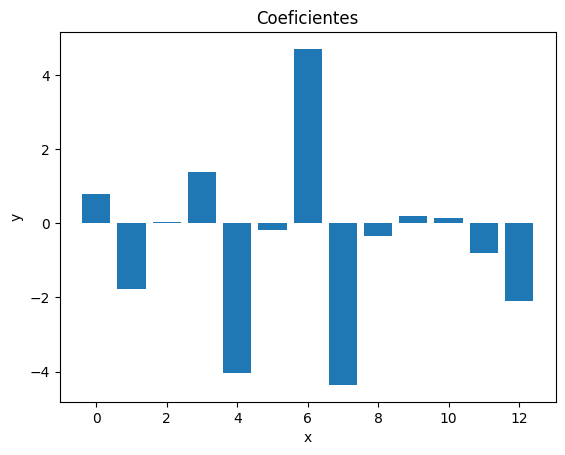

In [57]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [58]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [59]:
X_test.shape

(9818, 13)

In [60]:
predictions = model.predict(X_test)

In [61]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[6353  230]
 [2859  376]]


In [62]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average='macro'),2))
print("recall",round(recall_score(y_test,predictions,average='macro'),2))
print("f1_score: ",round(f1_score(y_test,predictions,average='macro'),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.69
precision:  0.66
recall 0.54
f1_score:  0.5
matthews_score:  0.16


In [68]:
X_train.shape

(9842, 13)

In [69]:
X_test.shape

(9818, 13)

In [70]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [71]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [78]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Acurracy:: 0.690000 (0.013779)
Logistic Regression Precision:: 0.710000 (0.013010)
Logistic Regression Recall:: 0.910000 (0.014566)
Logistic Regression F1-score:: 0.800000 (0.009284)


In [72]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.210000 (0.036819)


# Clasificación en Cascada

In [73]:
train2 = train[train['clases'] != "entailment"]
train2

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,2.625,3.987484,0.003045,0,0,1,14,5,9,0.307692,0.000000,neutral,0.965714,0.090
2,2.678,3.921521,0.003236,0,1,0,7,2,9,0.000000,0.000000,contradiction,0.910754,0.239
4,2.773,4.019877,0.003092,1,0,0,8,1,32,0.142857,0.000000,neutral,0.590696,1.135
5,2.662,4.160462,0.002935,2,0,1,7,1,32,0.000000,0.000000,contradiction,0.811420,0.502
6,2.637,3.948672,0.003085,0,2,0,9,4,18,0.000000,0.000000,contradiction,0.906333,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,2.590,3.966307,0.003048,0,1,0,9,2,17,0.000000,0.000000,contradiction,0.730502,0.698
9834,2.571,4.027660,0.002812,0,0,1,9,2,25,0.125000,0.000000,contradiction,0.919876,0.206
9838,2.827,3.957334,0.003194,0,0,1,9,2,12,0.000000,0.000000,contradiction,0.755218,0.692
9840,2.772,4.028790,0.002840,0,0,0,6,2,32,0.400000,0.333333,contradiction,0.948413,0.143


In [74]:
X2 = train2.drop(['clases'],axis=1)
y2_ = train2['clases']

In [75]:
test2 = test[test['clases'] != "contradiction"]
test2

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases,ent_rel,ent_rel2
0,2.553,4.050864,0.002734,0,0,0,7,3,18,0.000000,0.0,neutral,0.830004,0.434
1,2.783,4.029514,0.002743,0,0,0,6,1,18,0.000000,0.0,entailment,0.669781,0.919
3,2.674,4.029111,0.002930,0,0,0,4,1,13,0.000000,0.0,neutral,0.743455,0.686
4,2.694,3.967757,0.003058,0,0,0,5,1,13,0.000000,0.0,entailment,0.698218,0.813
6,2.619,0.000000,0.000000,1,0,0,8,0,12,0.428571,0.0,entailment,0.000000,2.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,2.546,0.000000,0.000000,2,1,1,10,0,16,0.000000,0.0,neutral,0.000000,2.546
9812,2.540,3.912625,0.002854,0,0,0,8,2,6,0.285714,0.0,neutral,0.809055,0.485
9814,2.720,3.900133,0.002878,0,1,0,6,1,6,0.000000,0.0,entailment,0.705147,0.802
9816,2.322,0.000000,0.000000,0,0,0,7,0,17,0.500000,0.0,entailment,0.000000,2.322


In [76]:
X2_test = test2.drop(['clases'],axis=1)
y2_test = test2['clases']

In [77]:
# SNLI cascada
y_train2=[]
c_y=0
c_u=0
for i in y2_:
    if i=="neutral":
        y_train2.append(0)
        c_u+=1
    elif i=="entailment":
        y_train2.append(1)
        c_n+=1
    else:
        print("ora",i)

ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contradiction
ora contra

In [105]:
# SNLI cascada
y_test2=[]
c_y=0
c_u=0
for i in y2_test:
    if i=="neutral":
        y_test2.append(0)
        c_u+=1
    elif i=="entailment":
        y_test2.append(1)
        c_n+=1
    else:
        print("ora",i)

In [106]:
model2 = LogisticRegression(penalty="l2", C=1)
model2.fit(X2,y2_)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [107]:
predictions2=model2.predict(X2_test)

In [108]:
predictions2

array(['contradiction', 'neutral', 'contradiction', ..., 'contradiction',
       'neutral', 'neutral'], dtype=object)

In [114]:
y2_test.values

array(['neutral', 'contradiction', 'neutral', ..., 'contradiction',
       'contradiction', 'neutral'], dtype=object)

In [115]:
print(confusion_matrix(y2_test.values, predictions2))

[[2058 1177]
 [1294 1923]]


In [124]:
y2_test_=[]
for a in y2_test:
    if a== "neutral":
        y2_test_.append(1)
    else:
        y2_test_.append(0)

In [127]:
predictions2_=[]
for a in predictions2:
    if a== "neutral":
        predictions2_.append(1)
    else:
        predictions2_.append(0)

In [128]:
print("acccuracy: ",round(accuracy_score(y2_test_,predictions2_),2))
print("precision: ",round(precision_score(y2_test_,predictions2_),2))
print("recall",round(recall_score(y2_test_,predictions2_),2))
print("f1_score: ",round(f1_score(y2_test_,predictions2_),2))
print("matthews_score: ",round(matthews_corrcoef(y2_test_,predictions2_),2))

acccuracy:  0.62
precision:  0.62
recall 0.6
f1_score:  0.61
matthews_score:  0.23


In [136]:
X_cv2=np.concatenate((X2, X2_test), axis=0)
Y_cv2=np.concatenate((y_train2,y2_test_ ), axis=0)

In [138]:
X_train_cv2=X_cv2
Y_train_cv2=Y_cv2

In [139]:
Y_train_cv2

array([1, 0, 1, ..., 0, 0, 1])

In [140]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv2, Y_train_cv2, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv2, Y_train_cv2, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv2, Y_train_cv2, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv2, Y_train_cv2, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Logistic Regression Acurracy:: 0.610000 (0.013511)
Logistic Regression Precision:: 0.610000 (0.028860)
Logistic Regression Recall:: 0.600000 (0.024421)
Logistic Regression F1-score:: 0.610000 (0.019444)


/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Valores SHAP

In [286]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
#linear_model

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.60      0.76      0.67       410
           2       0.62      0.55      0.59       318

    accuracy                           0.61       800
   macro avg       0.41      0.44      0.42       800
weighted avg       0.56      0.61      0.58       800



In [80]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [81]:
test.columns[:-1]

Index(['entropia_total', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'bi_ent_trip_rel'],
      dtype='object')

In [82]:
explainer.expected_value

array([-0.98479876,  0.57208293,  0.41271583])

In [83]:
X_test

array([[0.75070203, 0.        , 0.        , ..., 0.34285714, 0.16666667,
        0.33333333],
       [0.73697348, 0.        , 0.        , ..., 0.34285714, 0.5       ,
        0.75      ],
       [0.30639626, 0.        , 0.        , ..., 0.18095238, 0.33333333,
        0.33333333],
       ...,
       [0.83276131, 0.81851008, 0.06011267, ..., 0.4       , 0.42857143,
        1.        ],
       [0.77597504, 0.82029887, 0.07293904, ..., 0.21904762, 0.42857143,
        1.        ],
       [0.85616225, 0.        , 0.        , ..., 0.19047619, 0.5       ,
        0.5       ]])

In [84]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [85]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.53229329 0.82276753 0.04861899 0.         0.         0.
 0.22222222 0.09090909 0.3047619  0.2        0.66666667] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.69859594 0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.66666667]


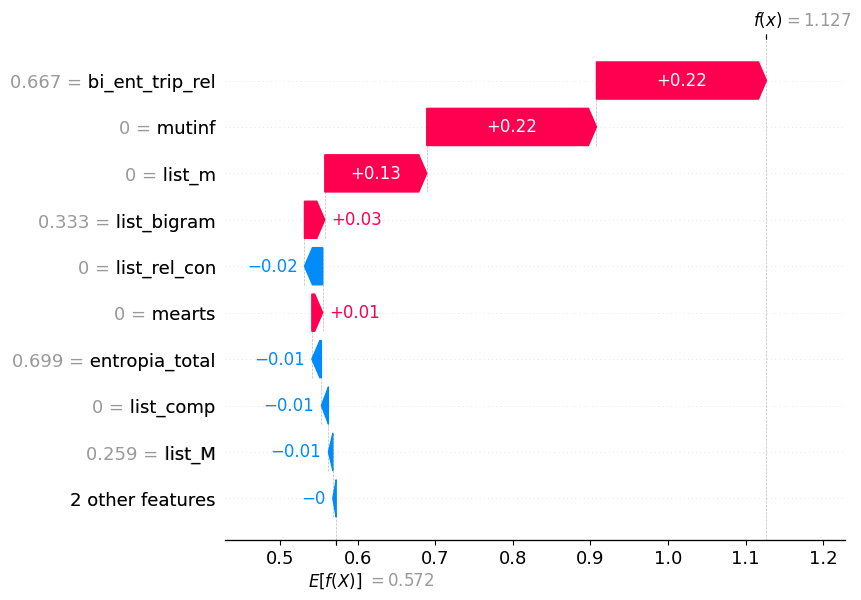

In [86]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

TypeError: only integer scalar arrays can be converted to a scalar index

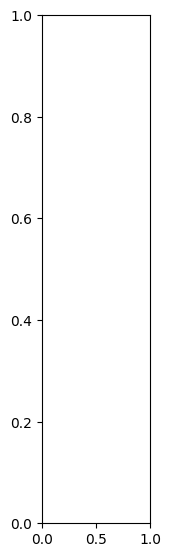

In [87]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

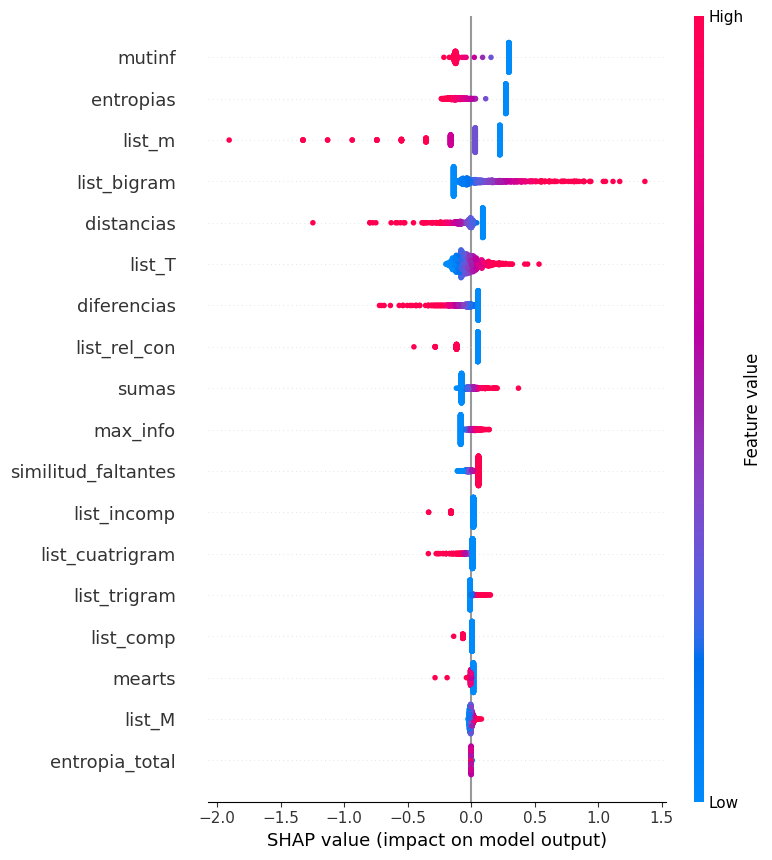

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

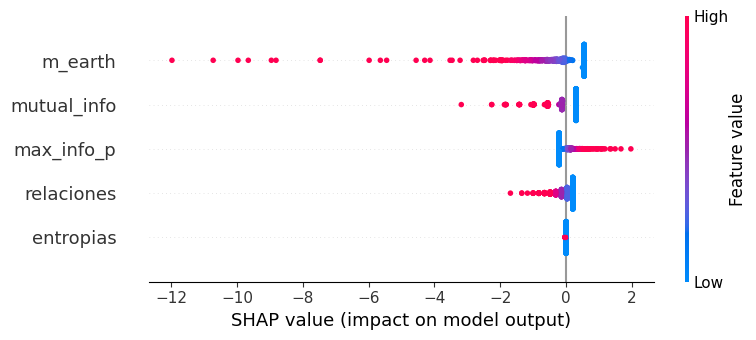

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

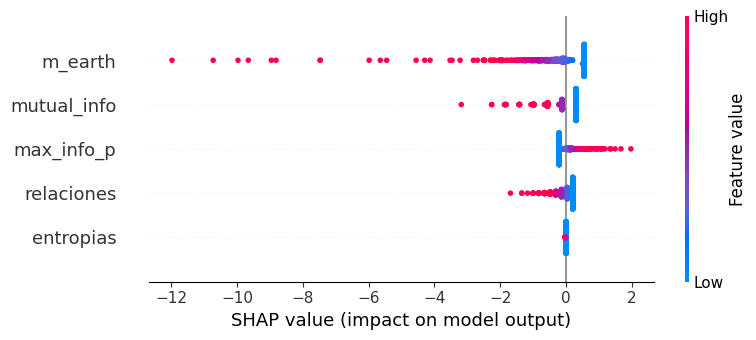

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


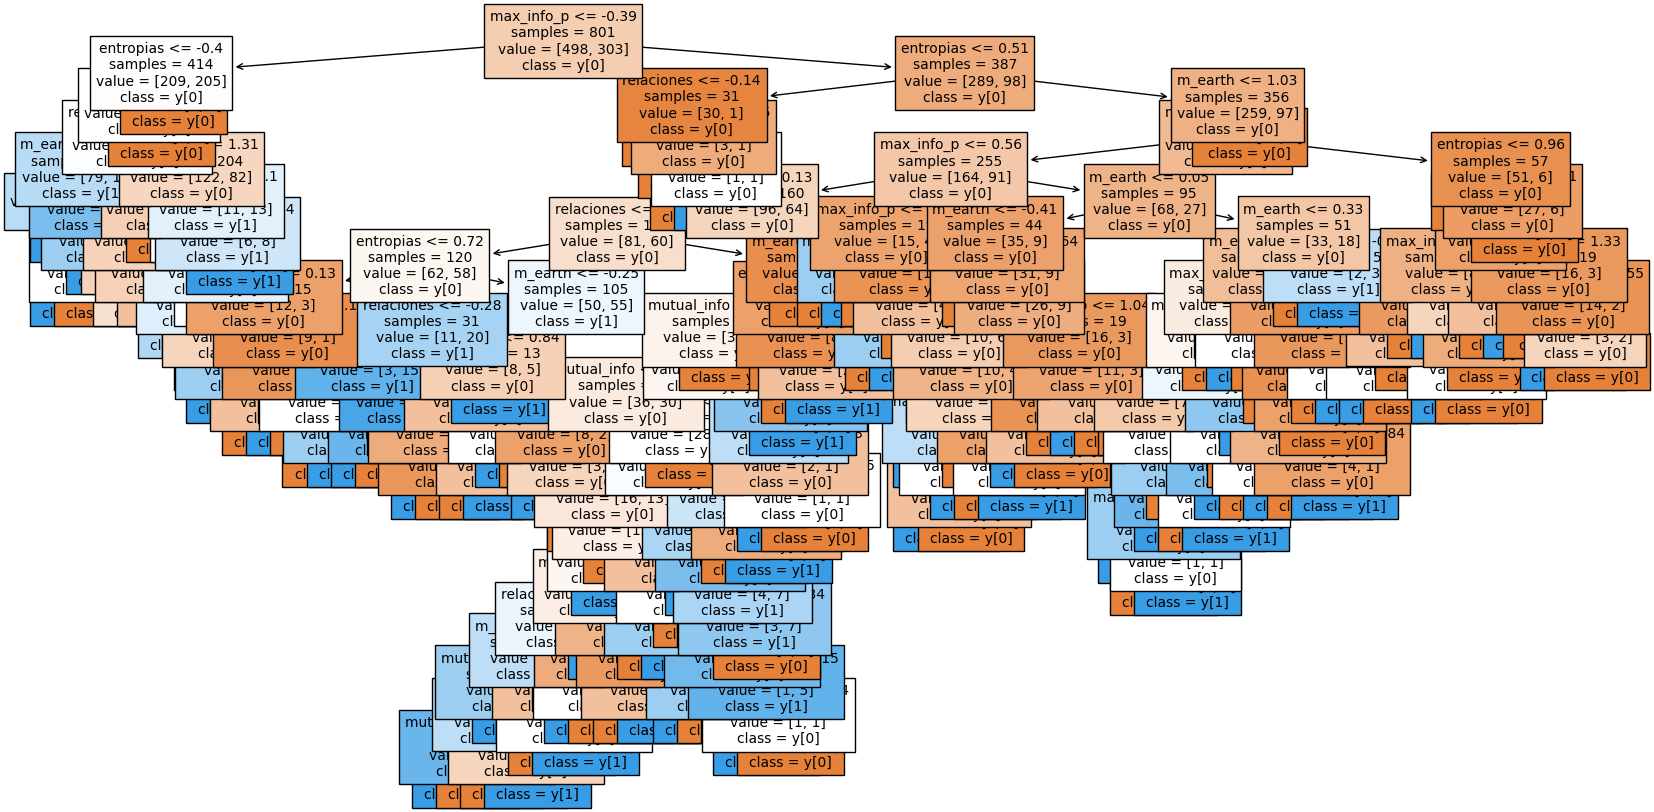

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )